**Method:**
- The average emittance between Set 1 and Set 2 is used here.
- The average of the acquisition time is considered here as well **to be confirmed that is correct**

**Note:**
- Set 1: IN acquisition of the WS
- Set 2: OUT acquisition of the WS


In [4]:
import os
import datascout as ds
import awkward as ak
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import statistics

In [5]:
# Plotting parameters
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [6]:
path2files = './example_WS_data_19Aug2021/'
files_list = sorted(os.listdir(path2files)[:-1])
print(files_list)

['2021.08.19.13.49.24.135000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.13.50.40.935000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.13.55.09.735000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.13.57.04.935000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.14.32.55.335000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.14.48.55.335000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.15.08.45.735000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.15.13.14.535000_SPS.BWS.41677.V-PM1.parquet', '2021.08.19.15.18.21.735000_SPS.BWS.41677.V-PM1.parquet']


## Part A:  Analysis for 1/80 bunches only for the Set 1 (IN acquisitions)

In [9]:
entry = 0
subentries = np.arange(0,80) # how many bunches
subsubentry=0 

2021-08-19 13:49:24
2021-08-19 13:50:40
2021-08-19 13:55:09
2021-08-19 13:57:04
2021-08-19 14:32:55
2021-08-19 14:48:55
2021-08-19 15:08:45
2021-08-19 15:13:14
2021-08-19 15:18:21


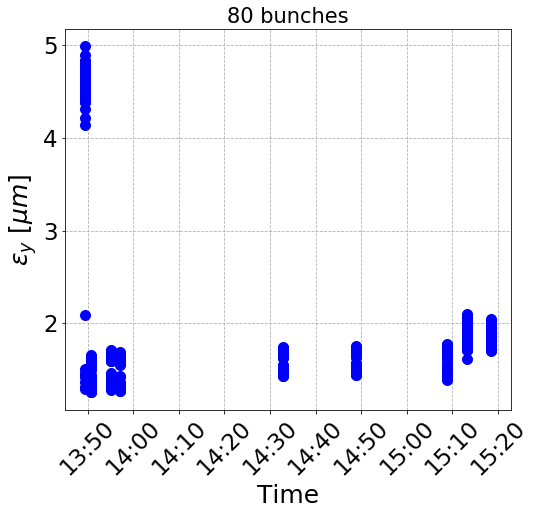

In [48]:
# plot all bunchces
fig, ax = plt.subplots(1)
bunch = 0
for filename in files_list:
    data = ds.parquet_to_awkward(path2files+filename) # type: awkward.highlevel.Array
    pd_data = ak.to_pandas(data) # convert awkward arrays to pandas for easier manipilation
    
    # convert epoch to time    
    emit = pd_data['emittance_Set1'][0].loc[:,0]
    
    timestamp = datetime.datetime.fromtimestamp(pd_data['cycleStamp'][0][bunch][0]/1e9) # entry in pd in ns
    time_list = [timestamp]*len(emit)
    print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
    xfmt = md.DateFormatter('%H:%M')
    
    ax.plot(time_list, emit*1e6, 'o', c='b')

ax.set_title(f'{len(subentries)} bunches')
ax.set_xlabel('Time')
ax.set_ylabel(r'$\epsilon_y \ [\mu m]$')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.gca().xaxis.set_major_formatter(xfmt)
plt.grid(ls='--')